## Thinkful Capstone Narrative Analytics and Experimentation

### by:Dena Montague

## Description of Dataset
This is a dataset of suicides of several countries worldwide between 1987-2015.  The suicide rate is catagorized by generation, age, gender, poplation and gdp. For this Capstone Reserach Proposal , I analyzed the suicide rate in the U.S. from 2011-2015.

Suicide is a major concern in the U.S. particularly among men.  In the past five years men in generation X have a much higher rate of suicide than men in any other generation. Men in general have much higher rates of suicide than women.  

## Research Question: How can suicide rates among Gen X men be reduced?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('suicide.csv')
print(df)

          country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
5         Albania  1987  female    75+ years            1       35600   
6         Albania  1987  female  35-54 years            6      278800   
7         Albania  1987  female  25-34 years            4      257200   
8         Albania  1987    male  55-74 years            1      137500   
9         Albania  1987  female   5-14 years            0      311000   
10        Albania  1987  female  55-74 years            0      144600   
11        Albania  1987    male   5-14 years            0      338200   
12        Albania  1988  female    75+ years       

In [3]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
df.columns = ['country', 'year', 'sex', 'age', 'suicides', 'population', 'suicides_100k', 'country_year', 'HDI', 'gdp_year','gdp_per_capita', 'generation']

In [5]:
df.suicides.head()

0    21
1    16
2    14
3     1
4     9
Name: suicides, dtype: int64

In [6]:
US_all = df[(df['country']=='United States')]

## Exploring the Data
**Suicide rates in the U.S. from 1987-2015.**  The chart below shows that between 1987-2015, **Baby Boomers had the highest suicide rate among both male and female.**  

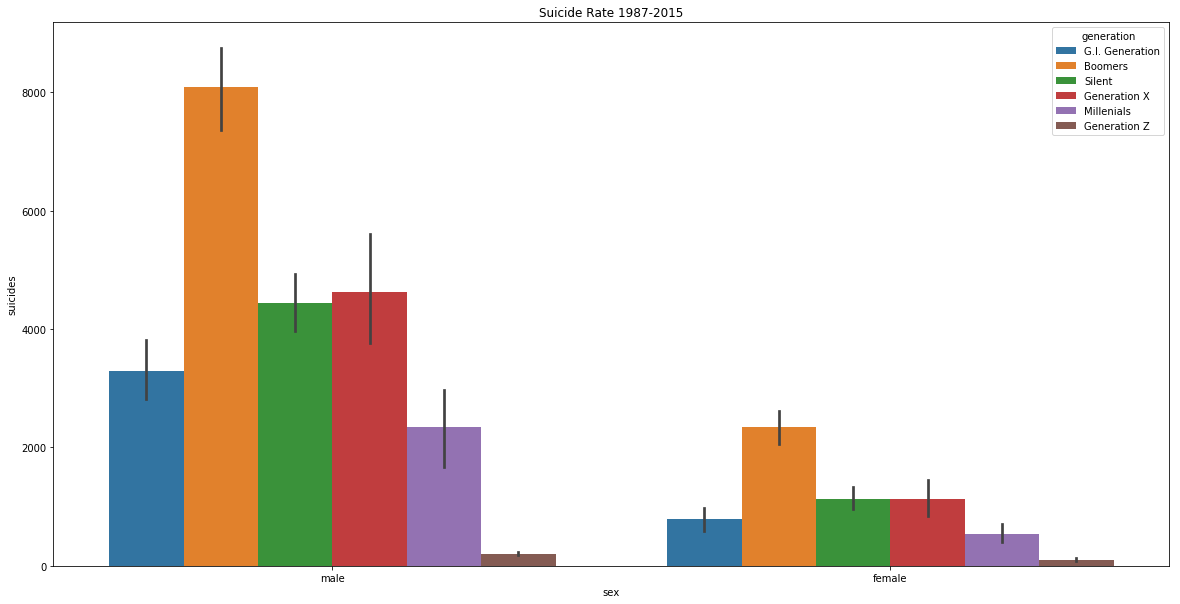

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x = US_all['sex'], y = US_all['suicides'], hue = US_all['generation'], data = df)
plt.title('Suicide Rate 1987-2015')
plt.show()

In [8]:
US = df[(df['country']=='United States')&(df['year']>=2011)]

In [9]:
US.head()

,country,year,sex,age,suicides,population,suicides_100k,country_year,HDI,gdp_year,gdp_per_capita,generation
27160,United States,2011,male,75+ years,2721,7448796,36.53,United States2011,0.911,"15,517,926,000,000",53452,Silent
27161,United States,2011,male,35-54 years,11681,42566273,27.44,United States2011,0.911,"15,517,926,000,000",53452,Generation X
27162,United States,2011,male,55-74 years,7572,28556351,26.52,United States2011,0.911,"15,517,926,000,000",53452,Boomers
27163,United States,2011,male,25-34 years,4862,20698307,23.49,United States2011,0.911,"15,517,926,000,000",53452,Millenials
27164,United States,2011,male,15-24 years,3959,22622559,17.50,United States2011,0.911,"15,517,926,000,000",53452,Millenials


## Exploring the Data
**Suicide Rate in the U.S. 2011-2015** The chart below shows that between 2011-2015 **Generation X had the highest rates of suicide among men and women.**  The difference between this chart and the chart above which tracks the suicide rate for a longer time, showing Boomers with a higher suicide rate raises interesting questions. Perhaps most suicide occur during adulthood.  During earlier years, Generation X might have been younger and therefore less likely to commit suicide.  Or perhaps there was a year or a number of years when Boomers commit suicide at a higher rate.  These are questions that could be explored in further reserach.  An interesting finding which I will explore in my reserach question is the stark difference between suicide rates of men and women.  Women commit suicide at a much lower rate than men across geneation and time.  

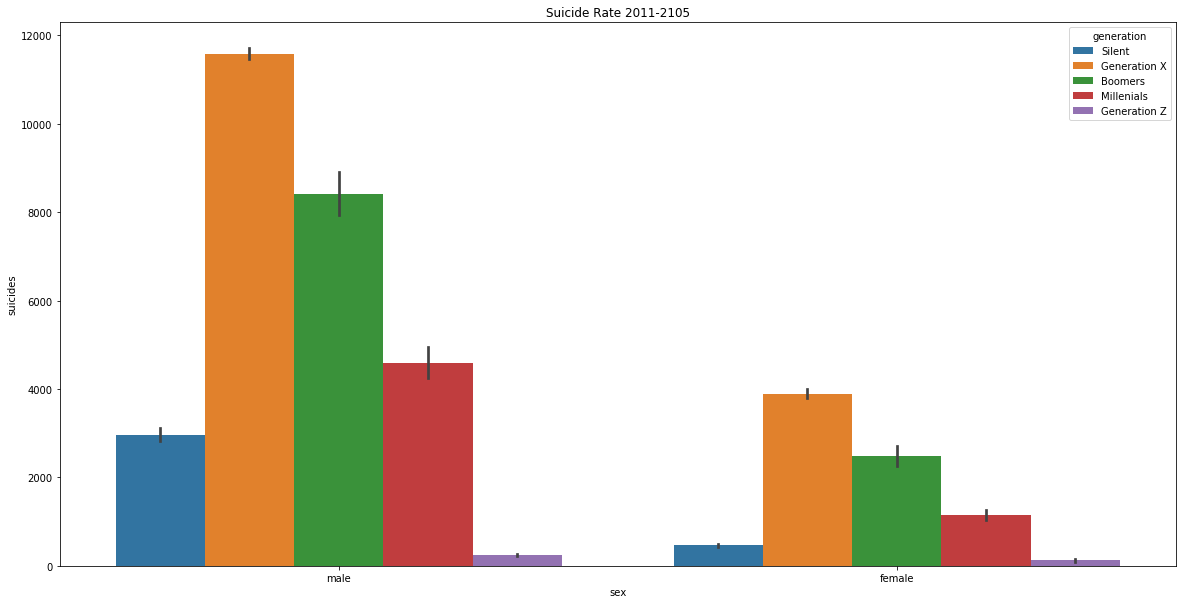

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x = US['sex'], y = US['suicides'], hue = US['generation'], data = df)
plt.title('Suicide Rate 2011-2105')
plt.show()

## Exploring the data
**Controlling for gender, the suicide rate is highest amongst Generation X**

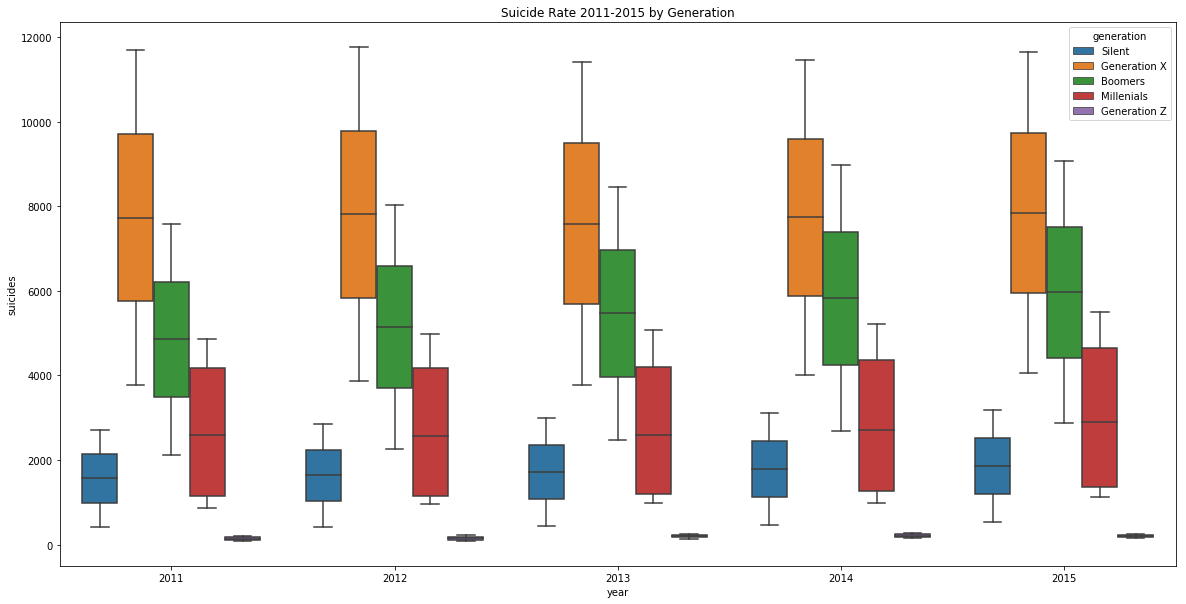

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(x=US['year'], y=US['suicides'],
            hue=US['generation'], data=df)
plt.title('Suicide Rate 2011-2015 by Generation')
plt.show()

## Exploring the Data
**When analyzing all generations together in the boxplot below - men have a higher rate of suicide than women**

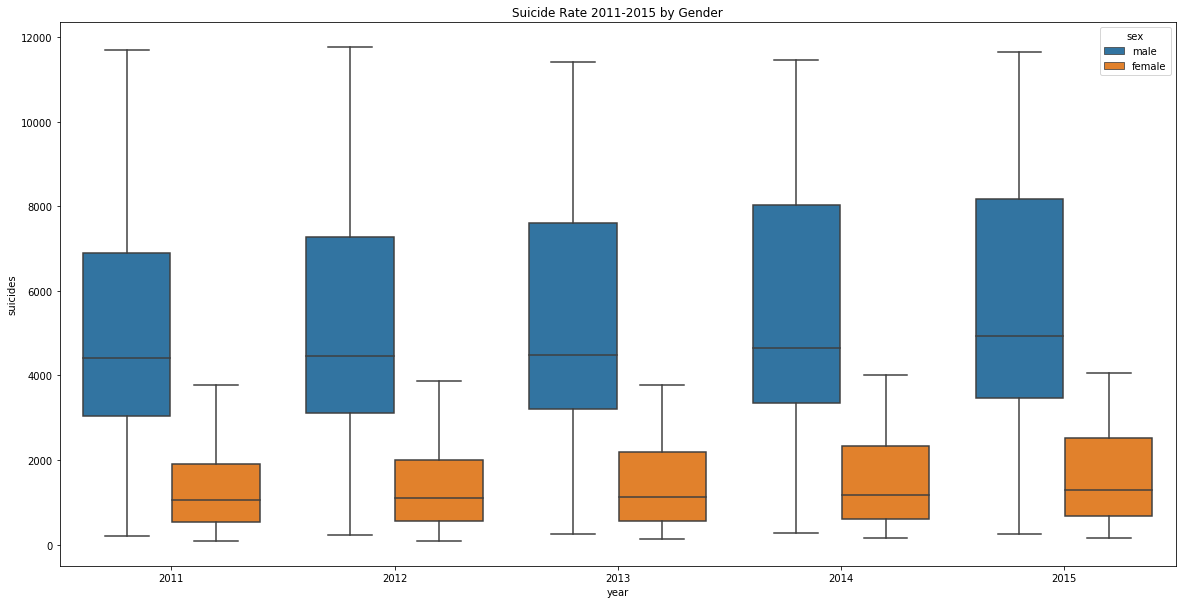

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x=US['year'], y=US['suicides'],
            hue=US['sex'], data=df)
plt.title('Suicide Rate 2011-2015 by Gender')
plt.show()
            

## Exploring the data
**the lineplot below gives another view of suicide rate by gender**

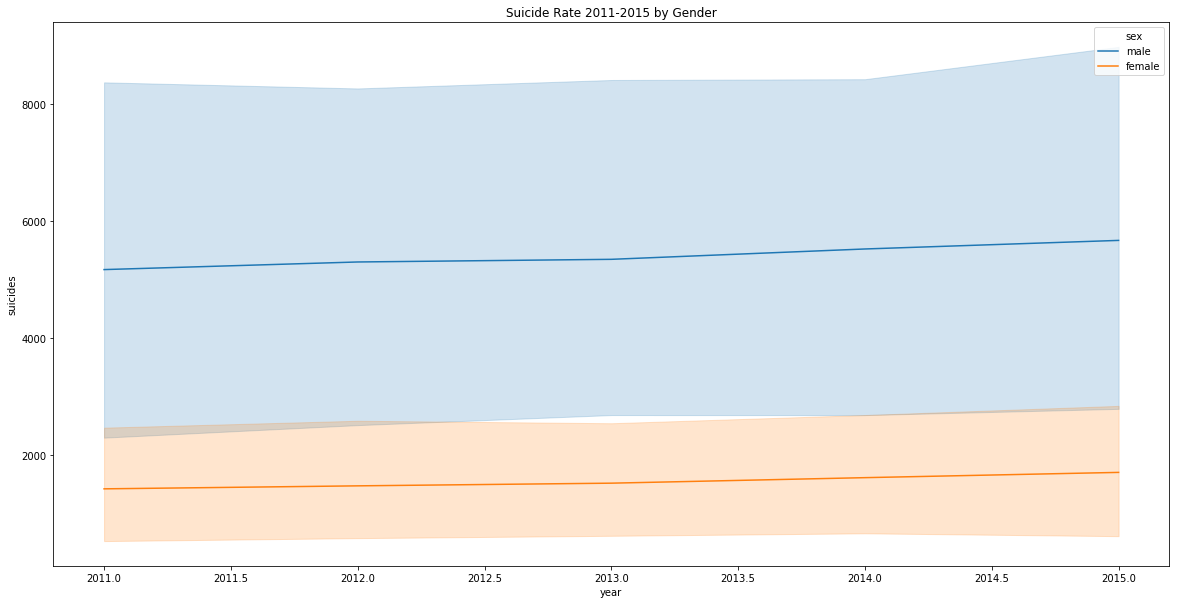

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(x=US['year'], y=US['suicides'], 
           hue=US['sex'], data=df)
plt.title('Suicide Rate 2011-2015 by Gender')
plt.show()

## The T-test shows that the difference between male and female suicide rate is statistically significant

 Men have a starkly higher rate of suicide as compared to women.  Therefore gender matters in suicide rate.
 My analysis will look at the male suicide rate from 2011-2015.


In [51]:
male = US.loc[(US['sex']=='male'),'suicides']
female = US.loc[(US['sex']=='female'),'suicides']

In [53]:
print(ttest_ind(female, male, equal_var = False))

Ttest_indResult(statistic=-5.292273660303197, pvalue=6.131874436189686e-06)


## Reserach Question
### How can suicide rates among Gen X men be reduced?

## Experiment Plan
### Analysis highlighting experimental hypothesis

The American Psychological Association (APA) recently produced its first ever guidelines for men and boys. In this report the APA examines traditional masculinity and patriarchy.  The report claims that traditional masculinity is harmful to men and leads to poor health outcomes including higher rates of suicide.  The guidelines encourage ways to improve the mental health of men including 1) Promoting the healthy intimate relationships among men and boys.  2) Address issues of male privilege and power.  Based on this information I would desgin a study that would see if generation X men were exposed to #1 and #2 during a program intervention, would there be a difference in mental health outcomes. 


The method of testing the solution: **How I would implement and roll out the solution.**

I would partner with the Psychology Department at UC Santa Barbara to design a recruitment program for a sample population of generation X men for this study, to ultimately understand dynamics of the larger population.  **The sample would be divided into two groups to perform an A/B test.  Group A  control group – no intervention.  Group B – participtes in a program designed to promote healthy relationships and address issues of male privilege and power.**  
 
**Metric Variables I would create a survey that measures depression and thoughts of suicide.** 
**Do these thoughts and levels of depresison increase, decrease, or stay same over a period of 6 months engaged in this program?**  Additional questions that would help the analysis - Do these men experience increased levels of happiness and healthier relationships?  Do the men experience improved understanding of how privilege and power can harm others?  
 
**Avoiding Simpsons Paradox – disaggregate data so to understand dynamics based on socio-economic status, race and region. Also disaggregate data based on family history and if the men are taking anti-depression medication.

**Risk for bias** – men who participate in the experimental groups know they are part of an intervention to improve their mental health.  Bias could emerge from the knowledge of being in a program – the placebo effect.  To avoid this bias surveys will be given to these groups again, 3 months after the program ends, to measure their levels of depression and thoughts of suicide.  Men the survey again 3 months after the program ends will allow us to measure if the intervention has long lasting effects and will eliminate possible placebo effect.
 
## Hypothesis – the group that receives the training will report lower levels of depression and thoughts of suicide


## Evaluation Plan: What constitute success? 
If men in the experimental group show lower levels of depression after participating in the program and followup surveys then my hypothesis is correct.  I would perform a t-test to compare the means of the experiment and control group to ensure the data is statistically significant.  If men do not show lower levels of depression after the experiment and followup survey then my hypothesis is not correct.  If the hypothesis is not correct, I would extend the period of time for the program intervention and increase the number of men in the study.  If after adjusting the experiment the men still do not show lower levels of depression I would conclude that the intervention was not effective in lowering levels of depression among generation X men.  